# Drawing 2D Primitives

# Reading the images from files

In [1]:
#Let's import OpenCV module
import cv2

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"    

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S01\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s01\env

d:\html_doc\program\opencv\packt\s01\env\lib\site-packages
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


In [2]:
#Now we'll specify the path to our image
image_path = 'data/test.jpg'

#We'll use OpenCV's built-in function 'imread' to read the image
#Specify the image_path in the imread function
image = cv2.imread(image_path)

#If image is loaded successfully
#Go ahead and print the details
if image is not None:
    print('Image Loaded Successfully')

Image Loaded Successfully


original image(507, 639, 3)
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] [ 75 117 136] ]  image: uint8


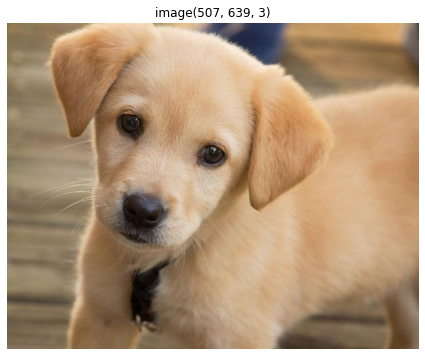

In [3]:
###########################################################
print_image('original image'+str(image.shape),'image',image,0,1,0,8)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image"+str(image.shape),image[:,:,[2,1,0]] ]
                   ])

# We'll create a window using namedWindow
# and fill it with the image that we just read.
cv2.namedWindow('Image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Image', image)
key = cv2.waitKey()
cv2.destroyAllWindows()

### Drawing a line

original image(507, 639, 3)
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] [ 75 117 136] ]  image: uint8
image_line
  Shape: (507, 639, 3)   Data type: uint8
[ [255   0   0] [255   0   0] [255   0   0] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] [ 75 117 136] ]  image_line: uint8


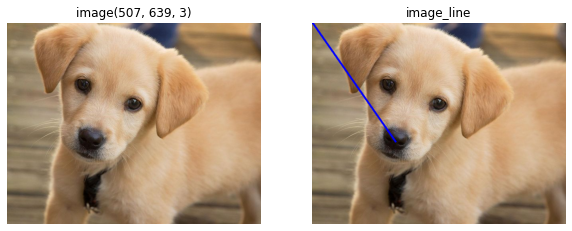

In [4]:
import numpy as np

# Draw a diagonal blue line 
# From top-left to the nose
# with thickness of 5 px

image_line = cv2.line(np.copy(image), (0,0), (210,300), (255,0,0), 3)   #(B, G, R)


###########################################################
print_image('original image'+str(image.shape),'image',image,0,1,0,8)
print_image('image_line','image_line',image_line,0,1,0,8)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image"+str(image.shape),image[:,:,[2,1,0]] ],
                    ["image_line",image_line[:,:,[2,1,0]] ]
                   ])
cv2.imshow('Image,image_line', np.hstack([image,image_line]))
key = cv2.waitKey()
cv2.destroyAllWindows()

### Drawing Rectangle

original image(507, 639, 3)
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] ]
[ [ 62 105 122] [ 65 108 125] [ 69 112 129] [ 72 115 132] [ 74 117 134] [ 74 117 134] [ 75 117 136] ]
[ [ 64 107 124] [ 67 110 127] [ 71 114 131] [ 74 117 134] [ 76 119 136] [ 76 119 136] [ 77 119 138] ]
[ [ 66 109 126] [ 69 112 129] [ 73 116 133] [ 76 119 136] [ 77 120 137] [ 78 121 138] [ 79 121 140] ]
[ [ 67 110 127] [ 70 113 130] [ 74 117 134] [ 77 120 137] [ 79 121 140] [ 79 121 140] [ 80 122 141] ]
[ [ 68 111 128] [ 71 114 131] [ 75 118 135] [ 78 121 138] [ 79 121 140] [ 80 122 141] [ 81 123 142] ]
[ [ 68 110 129] [ 71 113 132] [ 75 117 136] [ 78 120 139] [ 80 122 141] [ 80 122 141] [ 81 122 144] ]
[ [ 68 110 129] [ 71 113 132] [ 75 117 136] [ 78 120 139] [ 80 122 141] [ 80 122 141] [ 81 122 144] ]  image: uint8
image_line
  Shape: (507, 639, 3)   Data type: uint8
[ [255   0   0] [255   0   0] [255   0   0] [ 7

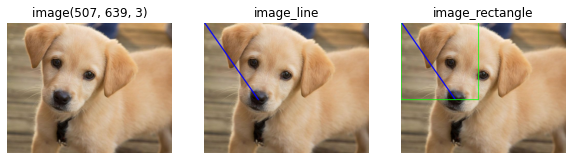

In [5]:
# Draw a rectangle from top-left to (300,300) 

image_rectangle = cv2.rectangle(np.copy(image_line), (0,0), (300,300),(0,255,0), 2) #(B, G, R)


############################################################
print_image('original image'+str(image.shape),'image',image,0,8,0,7)
print_image('image_line','image_line',image_line,0,6,0,7)
print_image('image_rectangle','image_rectangle',image_rectangle,0,8,0,7)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image"+str(image.shape),image[:,:,[2,1,0]] ],
                    ["image_line",image_line[:,:,[2,1,0]] ],
                    ["image_rectangle",image_rectangle[:,:,[2,1,0]] ]
                   ])
cv2.imshow('Image,image_line, image_rectangle', np.hstack([image,image_line, image_rectangle]))
key = cv2.waitKey()
cv2.destroyAllWindows()

### Drawing Circle

original image(507, 639, 3)
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] ]
[ [ 62 105 122] [ 65 108 125] [ 69 112 129] [ 72 115 132] [ 74 117 134] [ 74 117 134] [ 75 117 136] ]  image: uint8
image_line
  Shape: (507, 639, 3)   Data type: uint8
[ [255   0   0] [255   0   0] [255   0   0] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 74 117 134] [ 74 117 134] [ 75 117 136] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 76 119 136] [ 77 119 138] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 79 121 140] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 80 122 141] ]
[ [ 68 111 128] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] ]
[ [ 68 110 129] [ 71 113 132] [255   0   0] [25

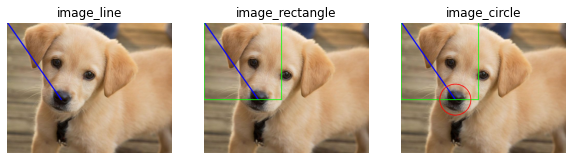

In [6]:
# We'll draw a circle by providing a single point and radius of the circle

image_circle = cv2.circle(np.copy(image_rectangle), (210,300), 60, (0,0,255), 2) #(B, G, R)


############################################################
print_image('original image'+str(image.shape),'image',image,0,2,0,7)
print_image('image_line','image_line',image_line,0,8,0,7)
print_image('image_rectangle','image_rectangle',image_rectangle,0,8,0,7)
print_image('image_circle','image_circle',image_circle,297,304,267,274)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image_line",image_line[:,:,[2,1,0]] ],
                    ["image_rectangle",image_rectangle[:,:,[2,1,0]] ],
                    ["image_circle",image_circle[:,:,[2,1,0]] ]
                   ])
cv2.imshow('image_line, image_rectangle, image_circle', np.hstack([image_line, image_rectangle, image_circle]))
key = cv2.waitKey()
cv2.destroyAllWindows()

### Adding Text to Image

original image(507, 639, 3)
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] ]
[ [ 62 105 122] [ 65 108 125] [ 69 112 129] [ 72 115 132] [ 74 117 134] [ 74 117 134] [ 75 117 136] ]  image: uint8
image_line
  Shape: (507, 639, 3)   Data type: uint8
[ [255   0   0] [255   0   0] [255   0   0] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 74 117 134] [ 74 117 134] [ 75 117 136] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 76 119 136] [ 77 119 138] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 79 121 140] ]
[ [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [ 80 122 141] ]
[ [ 68 111 128] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] [255   0   0] ]
[ [ 68 110 129] [ 71 113 132] [255   0   0] [25

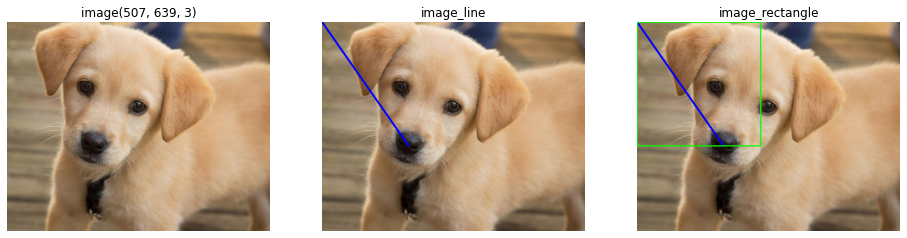

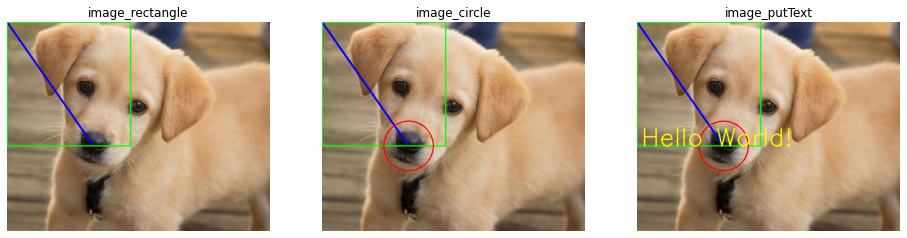

In [7]:
# To add text to our image, we'll use OpenCV's putText function

#First, we'll select a font
font = cv2.FONT_HERSHEY_SIMPLEX

#Next, we'll provide image, text, starting location, 
# font and similar parameters to the function
image_putText = cv2.putText(np.copy(image_circle), 'Hello World!', (10,300), font, 2, (0,255,255), 2, cv2.LINE_AA)


############################################################
print_image('original image'+str(image.shape),'image',image,0,2,0,7)
print_image('image_line','image_line',image_line,0,8,0,7)
print_image('image_rectangle','image_rectangle',image_rectangle,0,8,0,7)
print_image('image_circle','image_circle',image_circle,290,304,267,274)
print_image('image_putText','image_putText',image_putText,290,304,267,274)
plt.figure(figsize=(16,6))
plt_view_image(plt,[["image"+str(image.shape),image[:,:,[2,1,0]] ],
                    ["image_line",image_line[:,:,[2,1,0]] ],
                    ["image_rectangle",image_rectangle[:,:,[2,1,0]] ]
                   ])
plt.figure(figsize=(16,6))
plt_view_image(plt,[["image_rectangle",image_rectangle[:,:,[2,1,0]] ],
                    ["image_circle",image_circle[:,:,[2,1,0]] ],
                    ["image_putText",image_putText[:,:,[2,1,0]] ]
                   ])

cv2.imshow('image_circle, image_putText', 
           np.hstack([image_circle, image_putText]))
key = cv2.waitKey()
cv2.destroyAllWindows()